In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


2023-07-12 19:36:14.454730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Configure

In [2]:
c = xfirst.config.cut.A3
x = xfirst.data.load_depths('data', c).index.to_list()
y = 'Xfirst'
l = 4*[2**(len(x).bit_length() + 2)]
print(f'layers: {l}')

layers: [512, 512, 512, 512]


### Load profiles

In [3]:
data = xfirst.data.load_profiles(
  datadir = 'data',
  cut = c,
  nshowers = 10000,
  norm = True,
  xfirst = True,
)

### Train the MLP

In [4]:
model = xfirst.models.multilayer_perceptron_regressor(
  input = len(x),
  layers = l,
  epochs = 100,
).fit(data, x, y)

+ training the model on ['Edep_10', 'Edep_11', 'Edep_12', 'Edep_13', 'Edep_14', 'Edep_15', 'Edep_16', 'Edep_17', 'Edep_18', 'Edep_19', 'Edep_20', 'Edep_21', 'Edep_22', 'Edep_23', 'Edep_24', 'Edep_25', 'Edep_26', 'Edep_27', 'Edep_28', 'Edep_29', 'Edep_30', 'Edep_31', 'Edep_32', 'Edep_33', 'Edep_34', 'Edep_35', 'Edep_36', 'Edep_37', 'Edep_38', 'Edep_39', 'Edep_40', 'Edep_41', 'Edep_42', 'Edep_43', 'Edep_44', 'Edep_45', 'Edep_46', 'Edep_47', 'Edep_48', 'Edep_49', 'Edep_50', 'Edep_51', 'Edep_52', 'Edep_53', 'Edep_54', 'Edep_55', 'Edep_56', 'Edep_57', 'Edep_58', 'Edep_59', 'Edep_60', 'Edep_61', 'Edep_62', 'Edep_63', 'Edep_64', 'Edep_65', 'Edep_66', 'Edep_67', 'Edep_68', 'Edep_69', 'Edep_70', 'Edep_71', 'Edep_72', 'Edep_73', 'Edep_74', 'Edep_75', 'Edep_76', 'Edep_77', 'Edep_78', 'Edep_79', 'Edep_80', 'Edep_81', 'Edep_82', 'Edep_83', 'Edep_84', 'Edep_85', 'Edep_86', 'Edep_87', 'Edep_88', 'Edep_89', 'Edep_90', 'Edep_91', 'Edep_92', 'Edep_93', 'Edep_94', 'Edep_95', 'Edep_96', 'Edep_97', 'Edep_9

2023-07-12 19:36:37.987124: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Validation curve

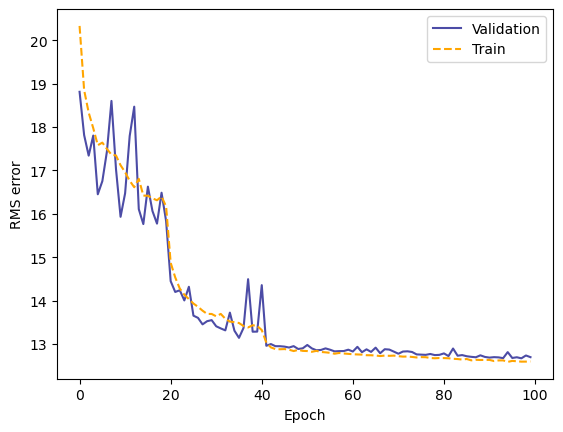

In [5]:
fig = model.draw()

### Compute predictions

+ computing predictions
1563/1563 [==============================] - 4s 3ms/step
+ drawing predictions


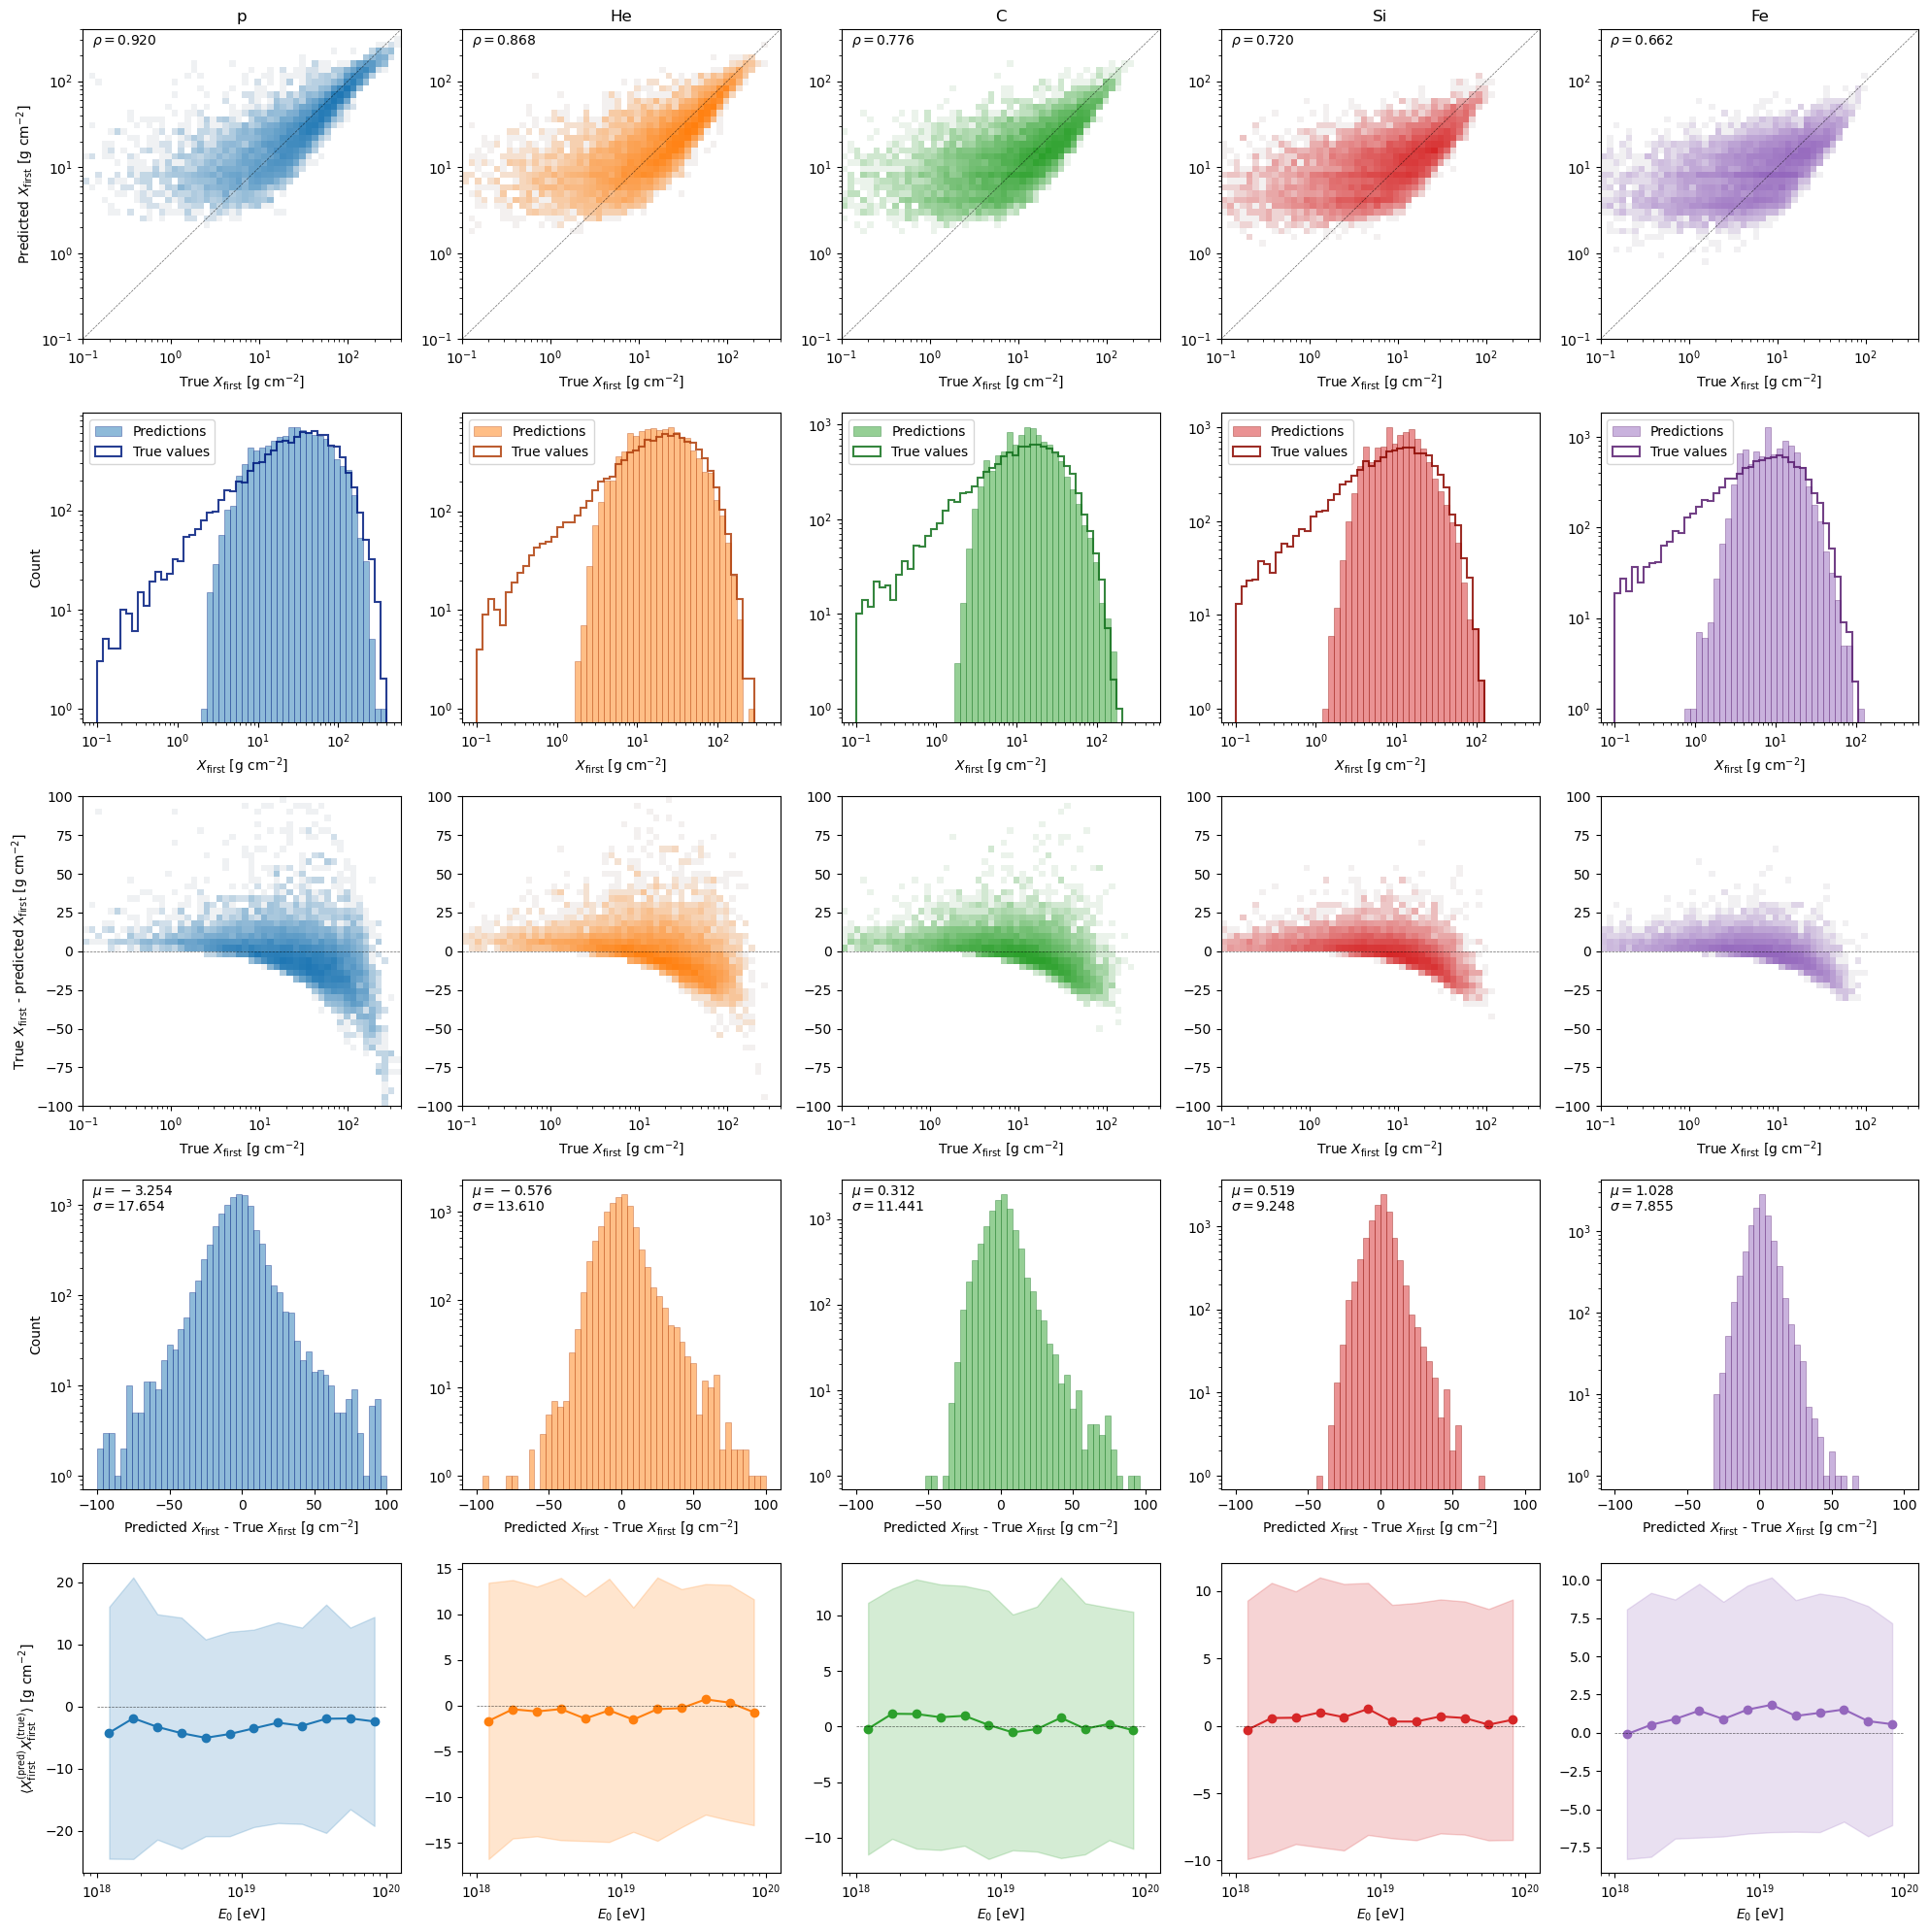

In [6]:
results = model.eval(data, plot = True)